In [77]:
from pandas_datareader import data as pdr

import yfinance as yf
import pandas as pd
import numpy as np
yf.pdr_override()

ibm_df= pdr.get_data_yahoo('ibm',start='1980-01-01', end='2023-10-23')

ibm_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-02,15.057361,15.415870,14.937859,14.937859,4.300867,1723808
1980-01-03,14.937859,15.176864,14.639101,15.176864,4.369677,2553495
1980-01-04,15.176864,15.236616,15.057361,15.146989,4.361076,1978195
1980-01-07,15.146989,15.146989,14.967734,15.087237,4.343875,1480718
1980-01-08,15.087237,16.132887,14.967734,16.103010,4.636330,2968130
...,...,...,...,...,...,...
2023-10-16,139.279999,139.779999,138.520004,139.210007,137.648911,3361500
2023-10-17,137.119995,140.619995,136.309998,140.320007,138.746460,4172800
2023-10-18,140.000000,140.429993,139.580002,139.970001,138.400391,3330000


<Axes: xlabel='Date'>

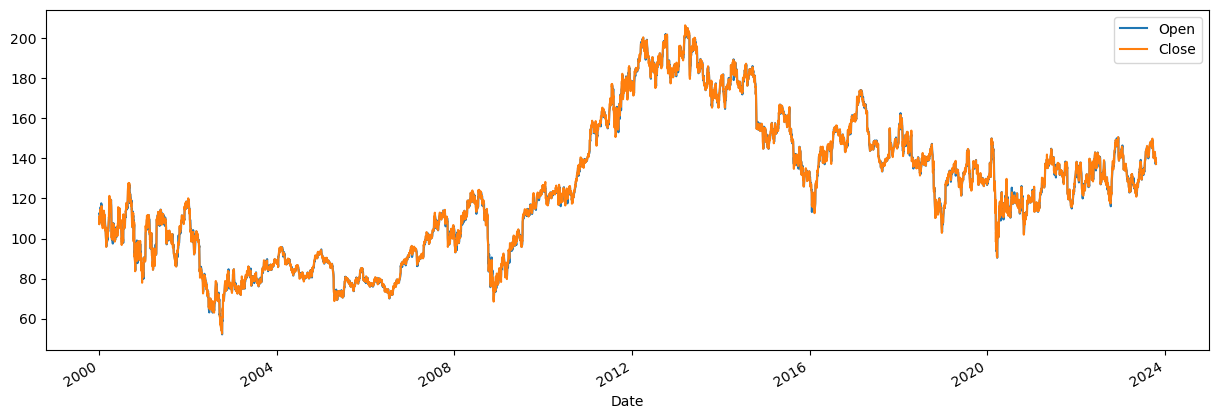

In [70]:
ibm_df.sort_index(ascending=True)[['Open','Close']].plot(figsize=(15,5))


In [72]:
mask_closeprice = ibm_df.Close > 80
high_price = ibm_df.loc[mask_closeprice]
high_price.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,107.492828,110.898659,106.955070,110.898659,61.026142,10823694
2000-01-04,108.986618,109.464630,105.999046,107.134323,58.954678,8606279
2000-01-05,107.970840,114.483749,107.194077,110.898659,61.026142,13318927
2000-01-06,112.810707,113.706978,108.508606,108.986618,59.973969,8338607
2000-01-07,112.093689,112.750954,105.760040,108.508606,59.710934,12402108


In [73]:
mask_volume = ibm_df.Volume>10000
high_volumeprice = ibm_df.loc[mask_closeprice | mask_volume]
high_volumeprice.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5.989000e+03
mean,124.578064,125.705038,123.531228,124.633710,85.677581,6.212463e+06
std,33.965756,34.016916,33.913172,33.971821,30.385515,3.452071e+06
min,52.246655,54.206501,51.634800,52.648186,29.410641,1.074765e+06
25%,94.942642,96.080307,94.168259,95.162521,54.474274,3.941433e+06
50%,123.078392,124.206497,122.179733,123.260040,94.613625,5.348303e+06
75%,146.548752,147.504776,145.573608,146.587006,111.986397,7.463524e+06
max,205.908218,206.405350,204.875717,206.309753,148.149811,4.310284e+07


<Axes: xlabel='Date'>

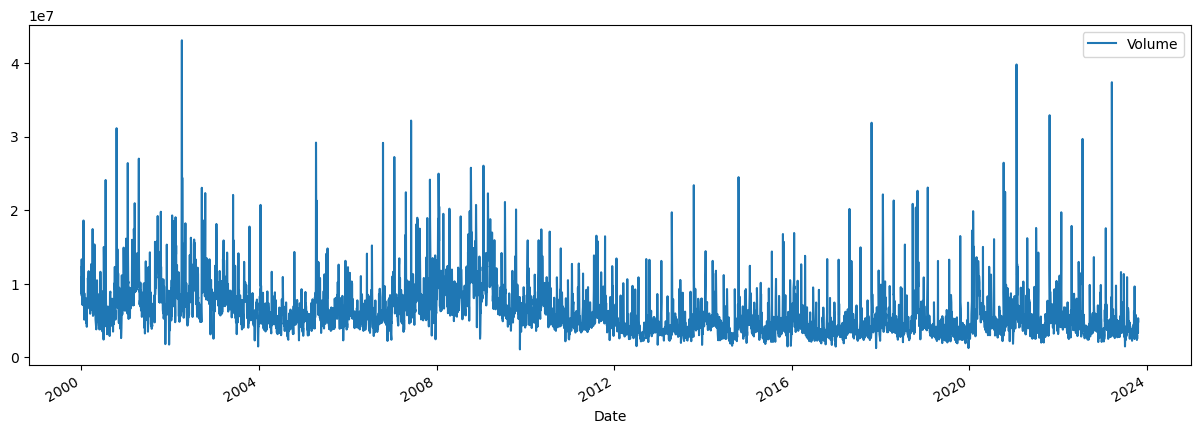

In [74]:
ibm_df.sort_index(ascending=True)[['Volume']].plot(figsize=(15,5))


<Axes: xlabel='Date'>

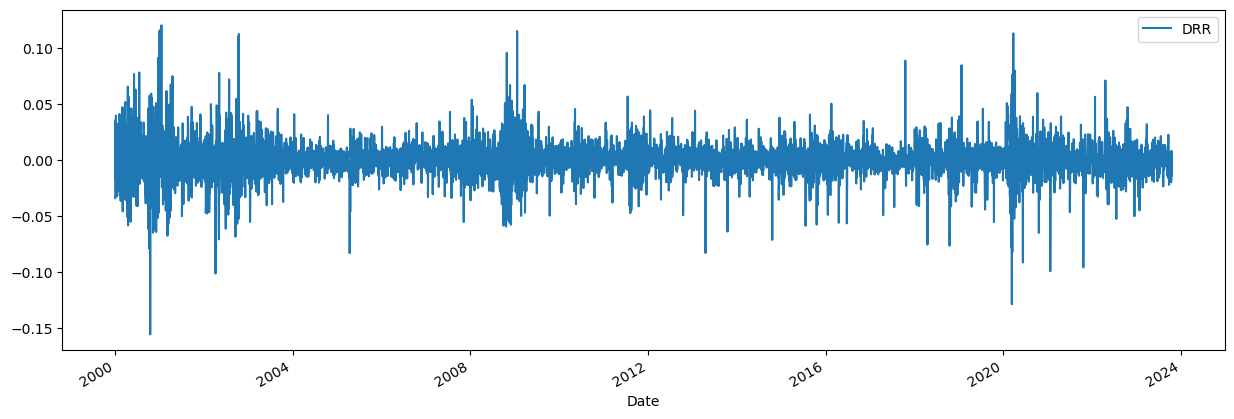

In [75]:
### Daily rate of return
ibm_df['DRR'] = ibm_df['Close'].pct_change()
ibm_df[['DRR']].plot(figsize=(15,5)) 


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2023-12-29,198.97,199.80,198.00,197.15,80367.29,-0.05,-0.03,194.286,191.530,193.950,75131.86,89161.24,100578.57,0.69
2023-12-28,191.03,198.66,198.05,190.66,138777.80,6.60,3.45,193.136,191.058,193.903,82657.93,91308.65,106269.69,1.19
2023-12-27,193.00,193.50,191.45,190.70,61364.02,-0.30,-0.16,191.462,190.371,193.958,81532.26,86680.54,108692.91,0.53
2023-12-26,192.16,192.16,191.75,190.00,41380.33,-0.43,-0.22,190.148,190.406,194.484,86244.42,92297.63,116587.03,0.36
2023-12-25,193.00,194.20,192.18,190.21,53769.86,-0.07,-0.04,189.398,190.864,195.392,93842.30,96139.31,120628.58,0.46
